<a href="https://colab.research.google.com/github/Nataliia-Kaguia/goit-ds-hw-05/blob/main/hw_05_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 0. Імпорт бібліотек
import pandas as pd
import numpy as np
import urllib.parse
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 1. Завантаження даних з Вікіпедії
url = "https://uk.wikipedia.org/wiki/Населення_України"
encoded_url = urllib.parse.quote(url, safe=':/')
df = pd.read_html(encoded_url, match="Коефіцієнт народжуваності в регіонах України")[0]


In [ ]:
# 2. Перші рядки
print("Перші 5 рядків таблиці:")
display(df.head())


Перші 5 рядків таблиці:


,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


In [ ]:
# 3. Розмір таблиці
print(f"Кількість рядків та стовпців: {df.shape}")


Кількість рядків та стовпців: (28, 9)


In [ ]:
# 4. Замінити "—" на NaN
df = df.replace("—", np.nan)

# 5. Типи стовпців
print("\nТипи даних до перетворення:")
print(df.dtypes)



Типи даних до перетворення:
Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object


In [ ]:
# 6. Перетворення на числові (крім першої колонки)
for col in df.columns[1:]:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(",", ".", regex=False)
    )
    df[col] = pd.to_numeric(df[col], errors="coerce")

print("\nТипи даних після перетворення:")
print(df.dtypes)



Типи даних після перетворення:
Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object


In [ ]:
# 7. Частка пропусків по колонках
missing_ratio = df.isnull().sum() / len(df) * 100
print("\nЧастка пропусків (%) по кожній колонці:")
print(missing_ratio)



Частка пропусків (%) по кожній колонці:
Регіон     0.000000
1950       7.142857
1960       3.571429
1970       3.571429
1990       0.000000
2000       0.000000
2012       0.000000
2014       7.142857
2019      14.285714
dtype: float64


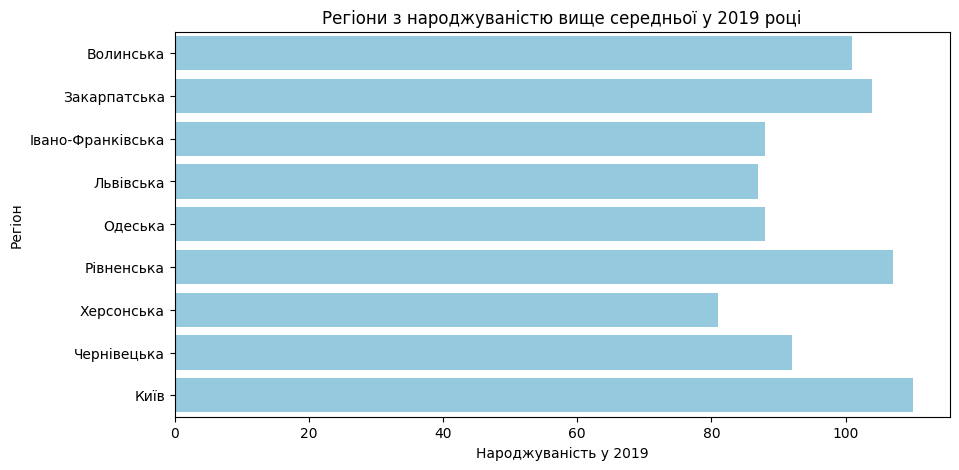

In [ ]:
# 8. Видалити останній рядок (по всій країні)
df = df.iloc[:-1]

# 9. Регіони з народжуваністю 2019 вище середнього + графік
avg_2019 = df["2019"].mean()
above_avg_2019_df = df[df["2019"] > avg_2019]

plt.figure(figsize=(10,5))
sns.barplot(data=above_avg_2019_df, x="2019", y=df.columns[0], color="skyblue")
plt.title("Регіони з народжуваністю вище середньої у 2019 році")
plt.xlabel("Народжуваність у 2019")
plt.ylabel("Регіон")
plt.show()


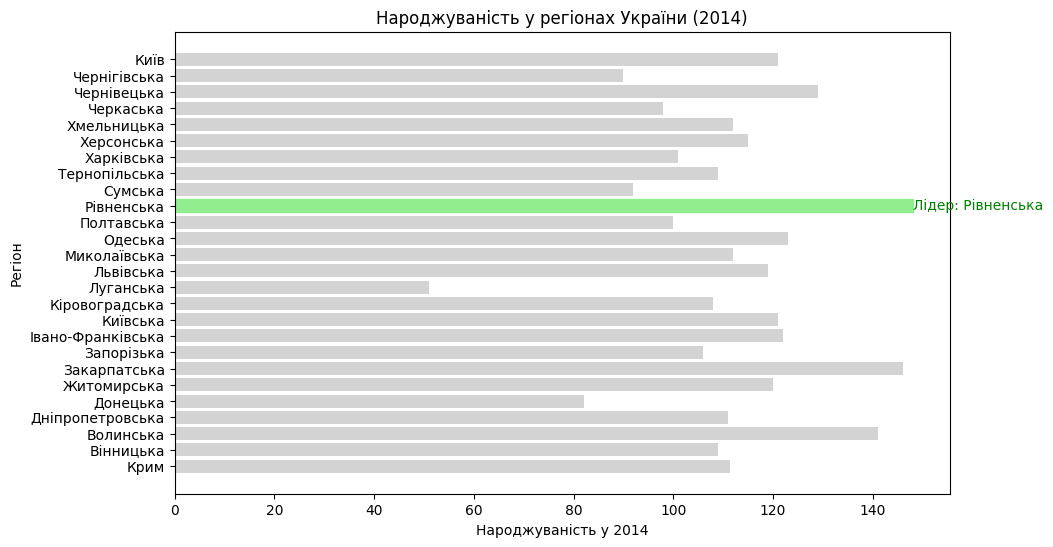

In [ ]:
# 10. Найвища народжуваність у 2014 + порівняння з іншими (без FutureWarning)
max_2014_idx = df["2014"].idxmax()
max_2014_region = df.loc[max_2014_idx, df.columns[0]]

# Малюємо через matplotlib, щоб повністю контролювати кольори
plt.figure(figsize=(10, 6))
bars = plt.barh(df[df.columns[0]], df["2014"], color="lightgray")

# Підсвічуємо лідера
bars[max_2014_idx].set_color("lightgreen")

# Заголовок і підписи
plt.title("Народжуваність у регіонах України (2014)")
plt.xlabel("Народжуваність у 2014")
plt.ylabel("Регіон")

# Додаємо текст для лідера
plt.text(df["2014"].max() + 0.05, max_2014_idx, f"Лідер: {max_2014_region}",
         va="center", fontsize=10, color="green")

plt.show()


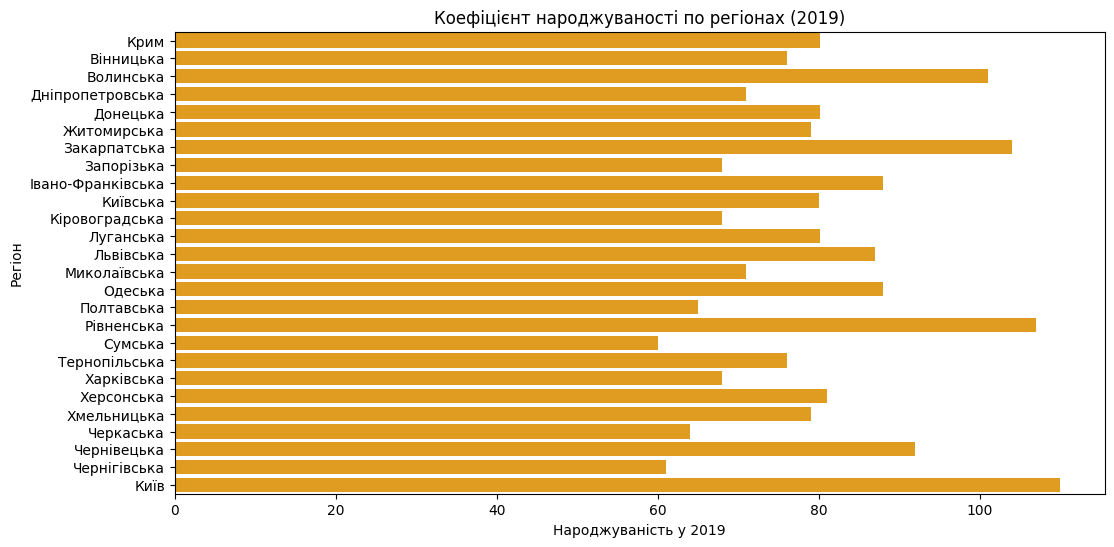

In [ ]:
# 11. Стовпчикова діаграма народжуваності у 2019
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="2019", y=df.columns[0], color="orange")
plt.title("Коефіцієнт народжуваності по регіонах (2019)")
plt.xlabel("Народжуваність у 2019")
plt.ylabel("Регіон")
plt.show()
